## Sales of summer clothes in E-commerce Wish 

PROBLEM STATEMENT:

An e-commerce marketplace (wish.com) is looking to add an additional dimensionality in it's business operation, by incorporating a system to predict the volume of sales of the various products listed on the platform, in a definitive period (summer season in this scenario). This will give an outlook on the approximate revenue which would be generated over a given period of time, the dynamics in terms of the movement and demand for the different products listed on the marketplace and a way to know the inventory stocking required for the different products. This would in-turn help the merchants/sellers listing their products on the platform to prepare themselves in terms of the procurement of the right products and help reduce the number of items going unsold during that period. 

In order to come up with a model for predicting the sales data of the products, we have been provided with the below dataset:

## Data Description

title -Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation

title_orig - Original english title of the product

price-Price you would pay to get the product

retail_price- Reference price for similar articles on the market, or in other stores/places

currency_buyer- currency of the prices

units_sold-Number of units sold. Lower bound approximation by steps

uses_ad_boosts-Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever)

rating-Mean product rating

rating_count-Total number of ratings of the product

rating_five_count-Number of 5-star ratings

rating_four_count-Number of 4-star ratings

rating_three_count-Number of 3-star ratings

rating_two_count-Number of 2-star ratings

rating_one_count-Number of 1-star ratings

badges_count-Number of badges the product or the seller have

badge_local_product-A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else).

badge_product_quality-Badge awarded when many buyers consistently gave good evaluations

badge_fast_shipping-Badge awarded when this product's order is consistently shipped rapidly

tags-tags set by the seller

product_color-Product's main color

product_variation_size_id-One of the available size variation for this product

product_variation_inventory-Inventory the seller has. Max allowed quantity is 50

shipping_option_price-shipping price

shipping_is_express- the shipping is express or not.

countries_shipped_to-of countries this product is shipped to.

inventory_total-Total inventory for all the product's variations (size/color variations for instance)

has_urgency_banner-Whether there was an urgency banner with an urgency

urgency_text-Text banner that appear over some products in the search results.

merchant_title-Merchant's displayed name (show in the UI as the seller's shop name)

merchant_name-Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name.

merchant_info_subtitle-The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed).

merchant_rating_count-Number of ratings of this seller

merchant_rating-merchant's rating

merchant_id-merchant unique id

merchant_has_profile_picture-Convenience boolean that says whether there is a `merchant_profile_picture` url

merchant_profile_picture-Custom profile picture of the seller (if the seller has one). Empty otherwise.

product_url-To the product page. You may need to login to access it

theme-Search term used in the search bar of the website to get these search results.

crawl_month-meta: for info only.

### Import Relevant Libraries

In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# display all columns of the dataframe
#pd.options.display.max_columns = None

# display all rows of the dataframe
#pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.graphics.gofplots import qqplot

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')

### Read the files

In [7]:
data=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### Find the Shape

In [8]:
data.shape

(1573, 43)

### Understanding the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### Understanding Variable Distribution

In [10]:
data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


### Checking for missing values

In [11]:
(((data.isnull().sum()/len(data))[data.isnull().sum()/len(data)!=0])*100).sort_values(axis=0, ascending=False)

merchant_profile_picture     85.632549
has_urgency_banner           69.930070
urgency_text                 69.930070
rating_five_count             2.860776
rating_four_count             2.860776
rating_three_count            2.860776
rating_two_count              2.860776
rating_one_count              2.860776
product_color                 2.606484
origin_country                1.080737
product_variation_size_id     0.890019
merchant_name                 0.254291
merchant_info_subtitle        0.063573
dtype: float64

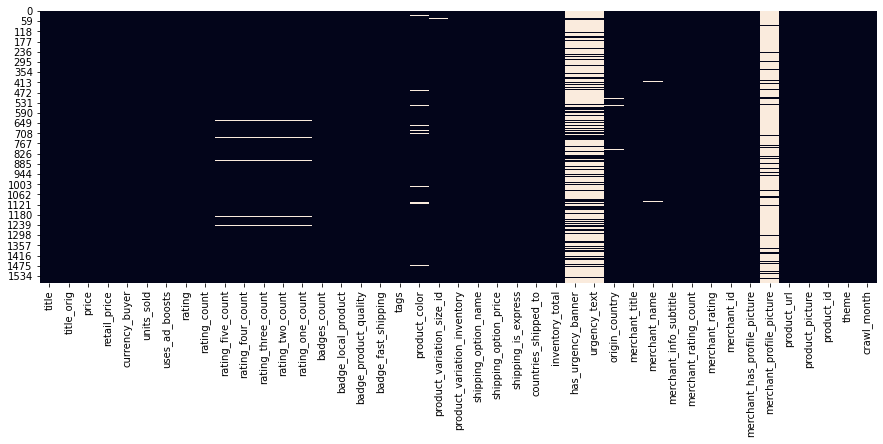

In [12]:
plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(data.isnull(), cbar = False)
plt.show()

### Handling Missing Values

In [13]:
# Since 85% of the data is missing we drop the column. The column is of type image.
data.drop('merchant_profile_picture',axis=1,inplace=True)
# Since 70% of the data is missing we drop the below mentioned columns:
data.drop('urgency_text',axis=1,inplace=True)
data.drop('has_urgency_banner',axis=1,inplace=True)

In [14]:
# Replacing rating columns that have missing values with mean

data['rating_one_count'].replace(to_replace=np.NaN,value=data['rating_one_count'].mean(),inplace=True)
data['rating_two_count'].replace(to_replace=np.NaN,value=data['rating_two_count'].mean(),inplace=True)
data['rating_three_count'].replace(to_replace=np.NaN,value=data['rating_three_count'].mean(),inplace=True)
data['rating_four_count'].replace(to_replace=np.NaN,value=data['rating_four_count'].mean(),inplace=True)
data['rating_five_count'].replace(to_replace=np.NaN,value=data['rating_five_count'].mean(),inplace=True)

In [15]:
# Replacing NaN values in product_color with color that sold the most

data['product_color'].replace(to_replace=np.NaN,value=data['product_color'].mode()[0],inplace=True)

In [16]:
# Replacing NaN values in origin_country with merchant that did the most number of sales

data['origin_country'].replace(to_replace=np.NaN,value=data['origin_country'].mode()[0],inplace=True)

In [17]:
# Replacing NaN values with most purchased size 

data['product_variation_size_id'].replace(to_replace=np.NaN,value=data['product_variation_size_id'].mode()[0],inplace=True)

In [18]:
# Replacing NaN values in merchant name with merchant that did the most number of sales

data['merchant_name'].replace(to_replace=np.NaN,value=data['merchant_name'].mode()[0],inplace=True)

In [19]:
# Replacing NaN values in merchant_info_subtitle with merchant_info_subtitle that occured most number of times

data['merchant_info_subtitle'].replace(to_replace=np.NaN,value=data['merchant_info_subtitle'].mode()[0],inplace=True)

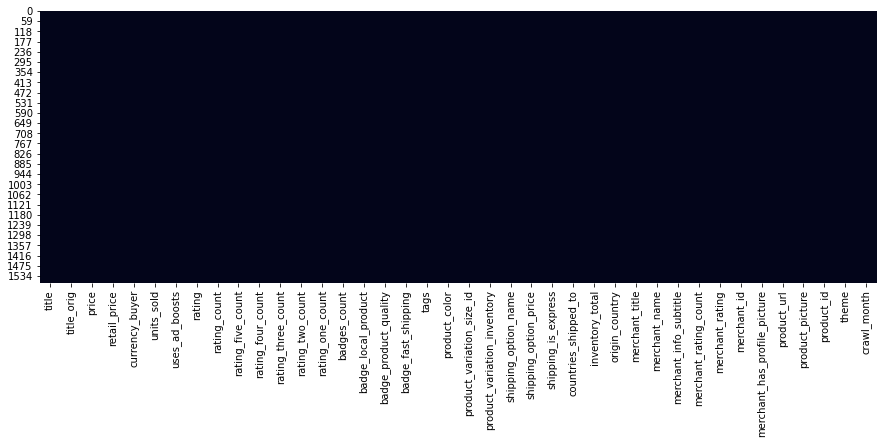

In [20]:
plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(data.isnull(), cbar = False)
plt.show()

### Spliting Target Variable and Independent variables

In [21]:
#X is the independent variables and Y is the dependent variable
X=data.drop('units_sold',axis=1)
Y=data['units_sold']

In [22]:
X.head()

,title,title_orig,price,retail_price,currency_buyer,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,0,3.76,54,26.0,8.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,1,3.45,6135,2269.0,1027.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,0,3.57,14,5.0,4.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,1,4.03,579,295.0,119.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,1,3.10,20,6.0,4.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### Find and remove the correlation / Multicorrelation between the variables

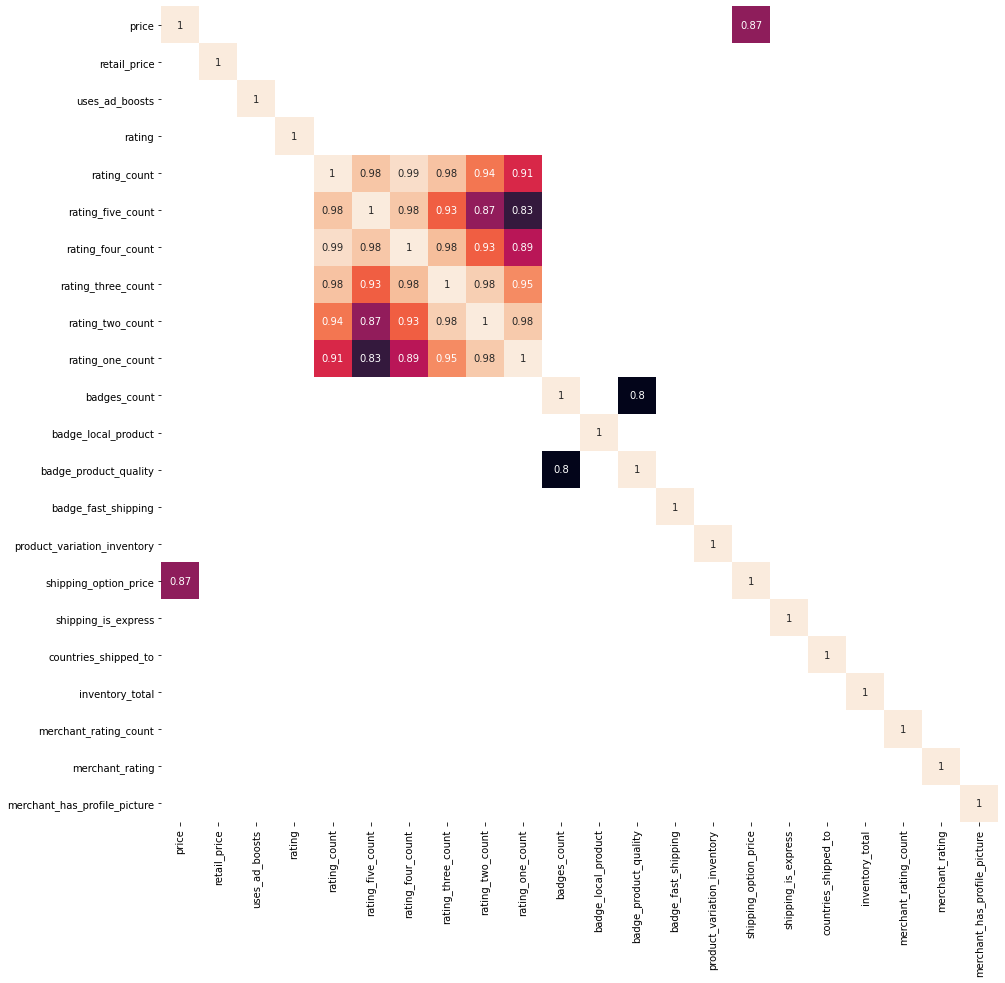

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr()[(X.corr()>.6) | (X.corr()<-0.6)],annot=True,cbar=False)
plt.show()

In [24]:
# The column rating_count is the sum of'rating_five_count', 'rating_four_count', 'rating_three_count', 
# 'rating_two_count', 'rating_one_count' so it can be removed.

X=X.drop(['rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count'],axis=1)

<AxesSubplot:>

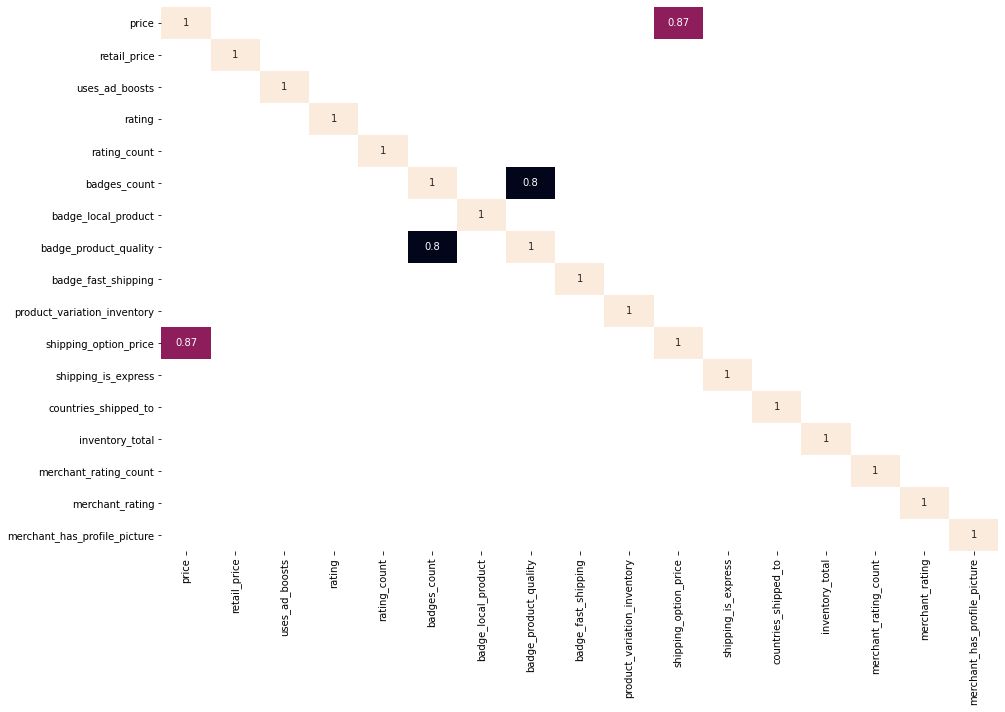

In [25]:
#After removing the above mentioned variables.
plt.figure(figsize=(15,10))
sns.heatmap((X.corr()[(X.corr()>.6) | (X.corr()<-0.6)]),annot=True,cbar=False)

### Analysing the object variables

In [26]:
X.shape

(1573, 34)

In [27]:
X.select_dtypes(include='object').columns

Index(['title', 'title_orig', 'currency_buyer', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_id', 'product_url', 'product_picture', 'product_id', 'theme',
       'crawl_month'],
      dtype='object')

In [28]:
# Since the currency is same for all products it doesn't make a difference in predictions
print(X.currency_buyer.value_counts())
X=X.drop('currency_buyer',axis=1)

EUR    1573
Name: currency_buyer, dtype: int64


In [29]:
print(data.merchant_title.value_counts())

guangzhouweishiweifushiyouxiangongsi        15
Suyi Technology                             12
sjhdstoer                                    9
Cenic Beauty                                 8
shuilingjiao international trade company     8
                                            ..
Keeptop international                        1
fashionstore0408                             1
xff                                          1
May One                                      1
better Interesting shop                      1
Name: merchant_title, Length: 958, dtype: int64


In [30]:
X=X.drop(['merchant_title','merchant_name','merchant_id','merchant_info_subtitle'],axis=1)

In [31]:
X=X.drop(['product_url','product_picture', 'product_id','theme','crawl_month'],axis=1)

In [32]:
X=X.drop(['title', 'title_orig'],axis=1)

In [33]:
X=X.drop(['tags'],axis=1)

In [34]:
X.select_dtypes(include='object').columns

Index(['product_color', 'product_variation_size_id', 'shipping_option_name',
       'origin_country'],
      dtype='object')

In [35]:
X.shipping_option_name.value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardowa wysyłka           3
Стандартная доставка          3
Standardversand               3
Livraison Express             3
Spedizione standard           2
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

#### Handling similar colors in product_color

In [36]:
X['product_color'] = X['product_color'].str.lower()
X[X['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['red & blue', 'blue & pink', 'white & green', 'black & green',
       'orange & camouflage', 'pink & black', 'pink & grey',
       'black & white', 'white & black', 'pink & white', 'pink & blue',
       'black & stripe', 'gray & white', 'brown & yellow',
       'winered & yellow', 'navyblue & white', 'white & red',
       'black & yellow', 'black & blue'], dtype=object)

In [37]:


shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 
    'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue','navy': 'blue',
    
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    
    'lightyellow': 'yellow', 
    
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    
    'lightpurple': 'purple', 'coolblack': 'black', 
    
    'apricot': 'orange', 'offblack': 'black'
}


In [38]:
def update_color(col):
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_colour.values():
        return col
    else:
        return 'other'

In [39]:
X['product_color'] = X.product_color.apply(update_color)

In [40]:
X['product_color'].value_counts()

black     349
white     260
blue      164
green     151
red       144
pink      108
yellow    107
grey       87
other      63
purple     54
dual       40
orange     29
brown      17
Name: product_color, dtype: int64

#### Handiling duplicates in product_variation_size_id

In [41]:
X.product_variation_size_id.unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS', 'W

In [42]:
X['product_variation_size_id'] = X['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

In [43]:
size_corrector = {
    '2xl': 'xxl', '3xl': 'xxxl', '4xl': 'xxxxl', '5xl': 'xxxxl', '6xl': 'xxxxl', 'x   l': 'xl', 'sizel': 'l',
    'size4xl': 'xxxxl','x   l': 'xl',
    '1 pc - xl': 'xl','32/l':'l'}

In [44]:
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

In [45]:
X['product_variation_size_id'] = X['product_variation_size_id'].replace(np.nan, 'other')

In [46]:
X['product_variation_size_id'] = X['product_variation_size_id'].map(change_size)

In [47]:
X['product_variation_size_id'].value_counts()

s        694
xs       369
other    213
m        206
l         51
xl        17
xxl       15
xxxs       6
xxxxl      2
Name: product_variation_size_id, dtype: int64

In [48]:
# Clubing the minority shiping options 
def change_name(cl):
    if cl in 'Livraison standard,Standard Shipping':
        return cl
    else:
        return 'other'

In [49]:
X['shipping_option_name'] = X['shipping_option_name'].map(change_name)

In [50]:
X['shipping_option_name'].value_counts()

Livraison standard    1508
other                   44
Standard Shipping       21
Name: shipping_option_name, dtype: int64

### Labeling and Encoding

In [51]:
data_obj=X.select_dtypes(include='object').head()

In [52]:
X.origin_country.value_counts()

CN    1533
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

In [53]:
encoded_color = pd.get_dummies(data=X['product_color'],prefix='color',drop_first=False)
encoded_color.head()

,color_black,color_blue,color_brown,color_dual,color_green,color_grey,color_orange,color_other,color_pink,color_purple,color_red,color_white,color_yellow
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
encoded_size= pd.get_dummies(data=X['product_variation_size_id'],prefix='size',drop_first=False)
encoded_size.head()

,size_l,size_m,size_other,size_s,size_xl,size_xs,size_xxl,size_xxxs,size_xxxxl
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [55]:
encoded_country = pd.get_dummies(data=X['origin_country'],prefix='country',drop_first=False)
encoded_country.head()

,country_AT,country_CN,country_GB,country_SG,country_US,country_VE
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [56]:
encoded_option = pd.get_dummies(data=X['shipping_option_name'],prefix='shipping_option',drop_first=False)
encoded_option.head()

,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
X=pd.concat([X,encoded_color,encoded_size,encoded_country,encoded_option],axis=1)

In [58]:
X=X.drop(['product_color','product_variation_size_id','origin_country','shipping_option_name'],axis=1)

In [59]:
X.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
0,16.00,14,0,3.76,54,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
1,8.00,22,1,3.45,6135,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
2,8.00,43,0,3.57,14,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,8.00,8,1,4.03,579,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
4,2.72,3,1,3.10,20,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [60]:
X.shape

(1573, 48)

In [61]:
#X_final=X.copy()

### Checking for outliers

In [62]:
data_num=data.select_dtypes(include='number')
data_num.columns
data_num=data_num.drop(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping','shipping_is_express','inventory_total','merchant_has_profile_picture'],axis=1)

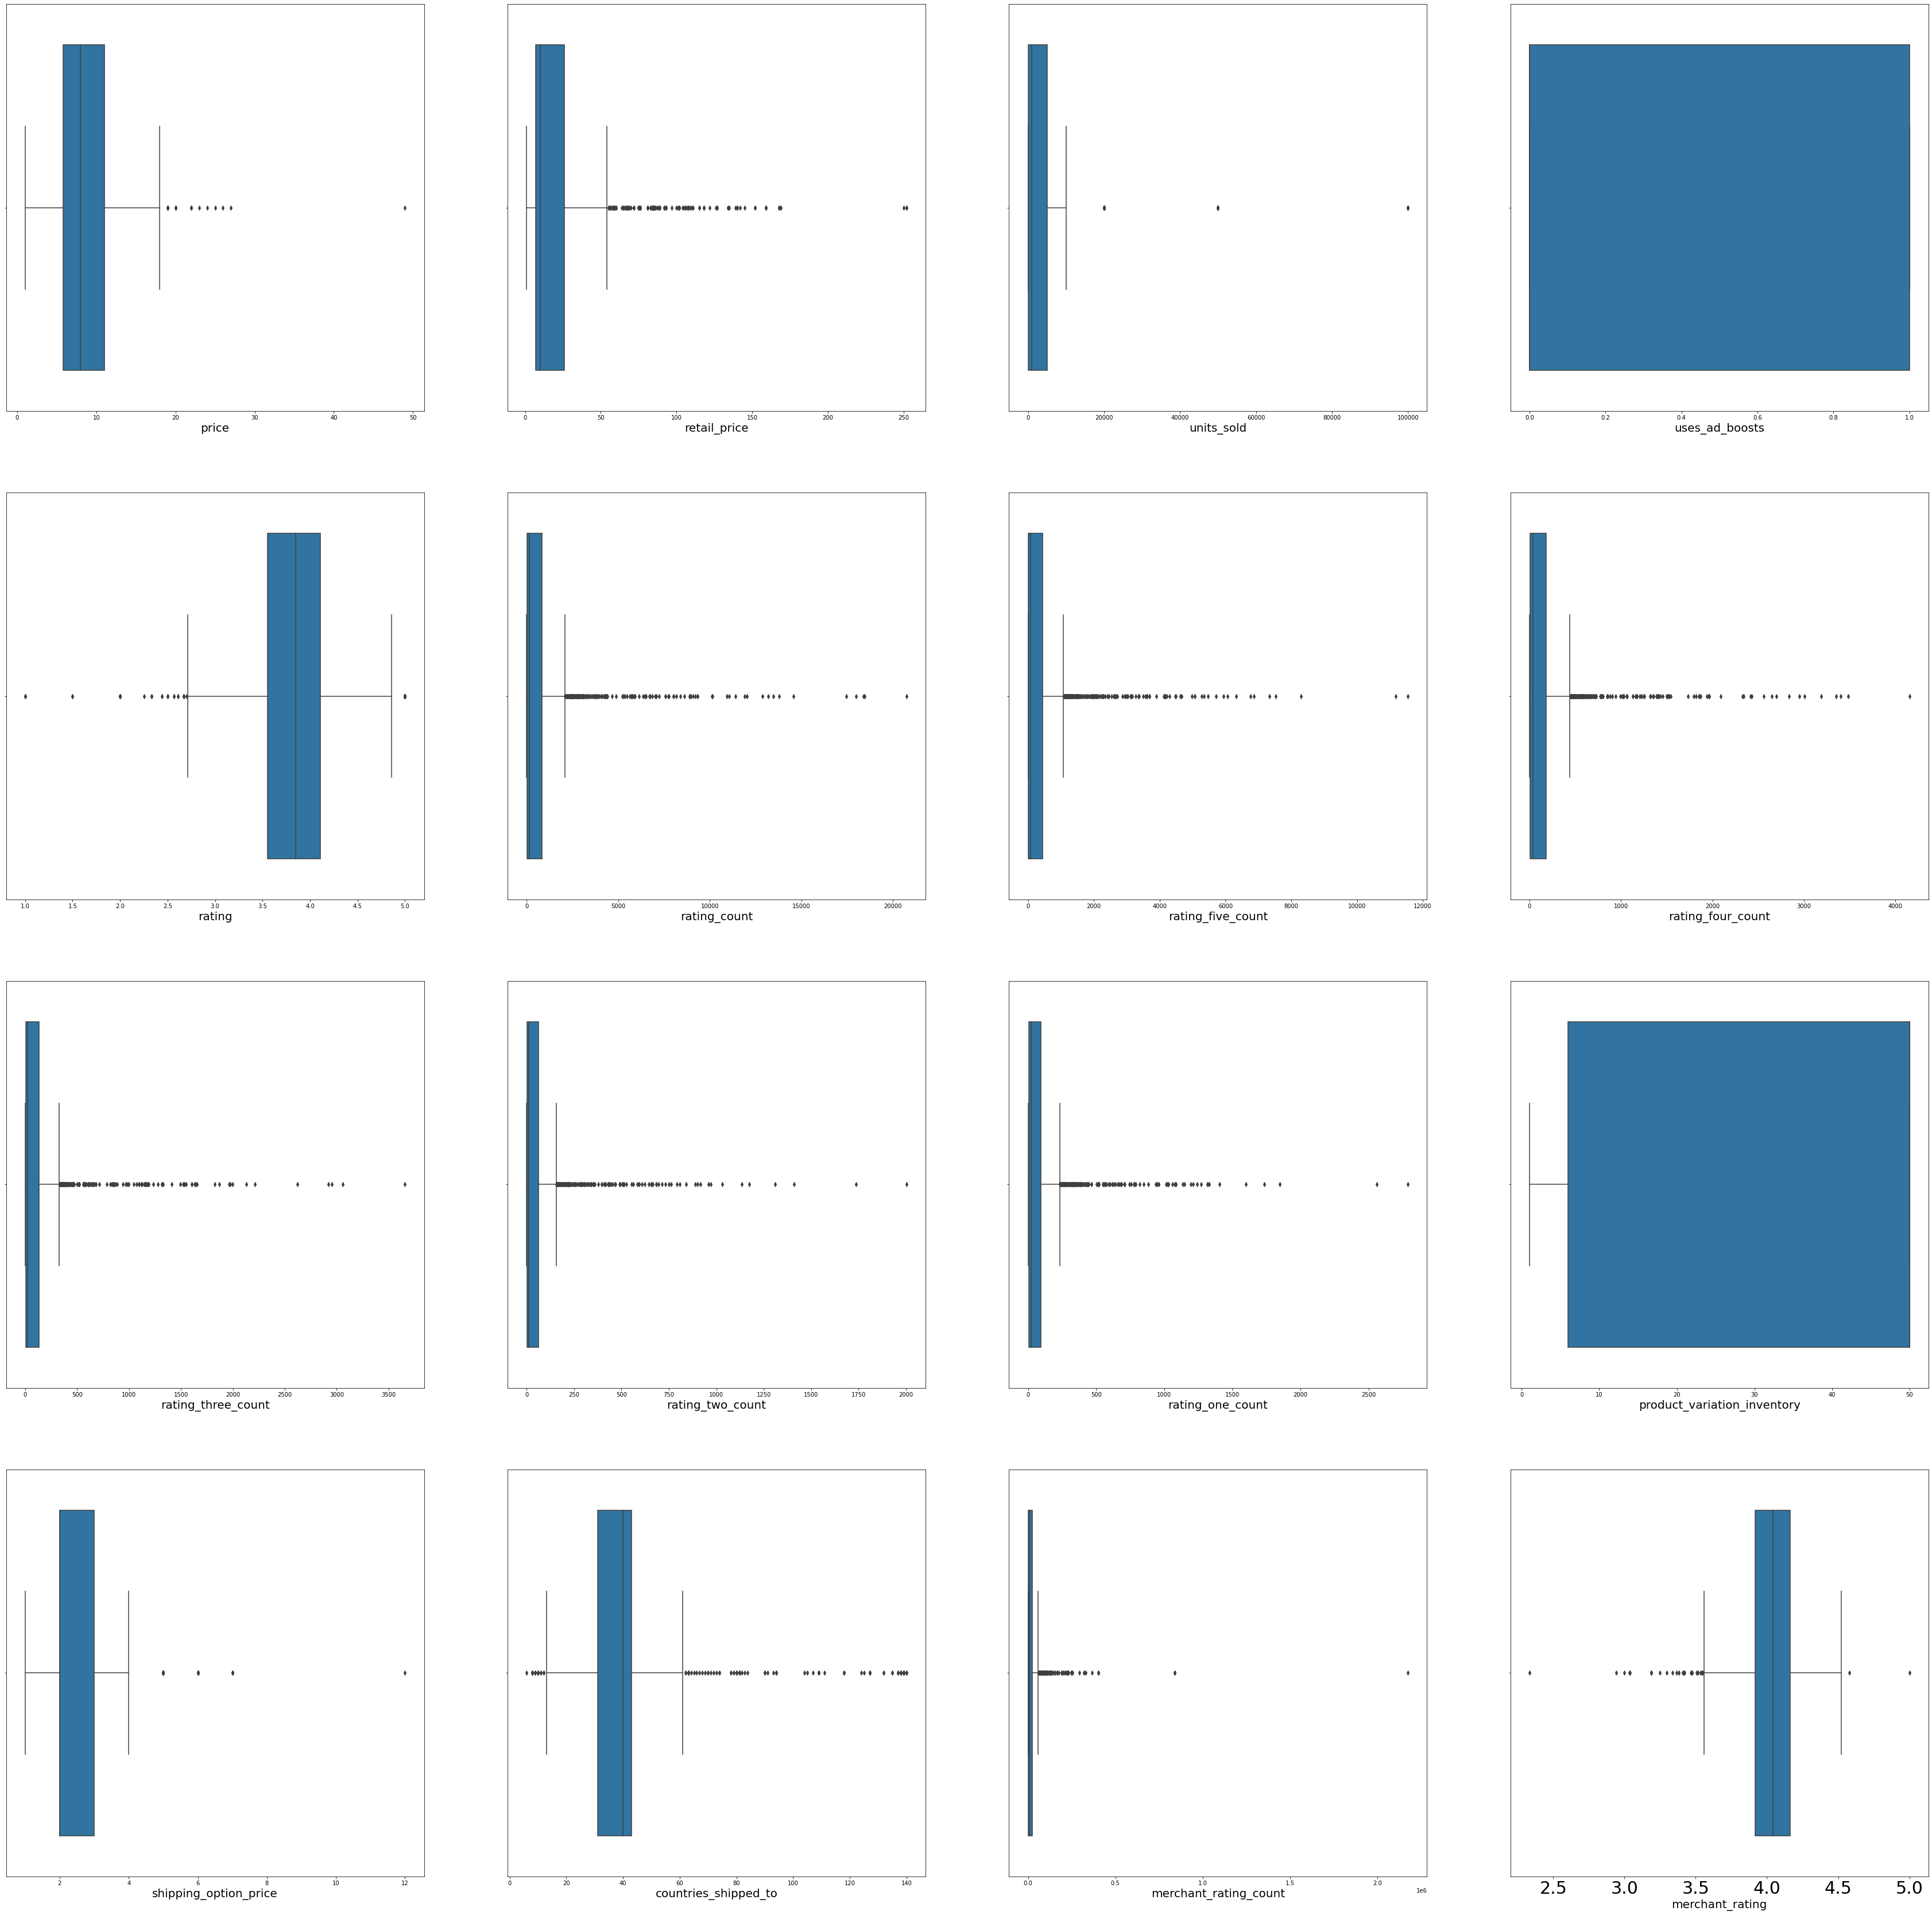

In [63]:
fig, ax = plt.subplots(4,4 , figsize=(60, 60))
plt.xticks(fontsize=30)
for variable, subplot in zip(data_num.columns, ax.flatten()):
    z = sns.boxplot(x = data_num[variable], orient = "v", whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)


<AxesSubplot:xlabel='units_sold'>

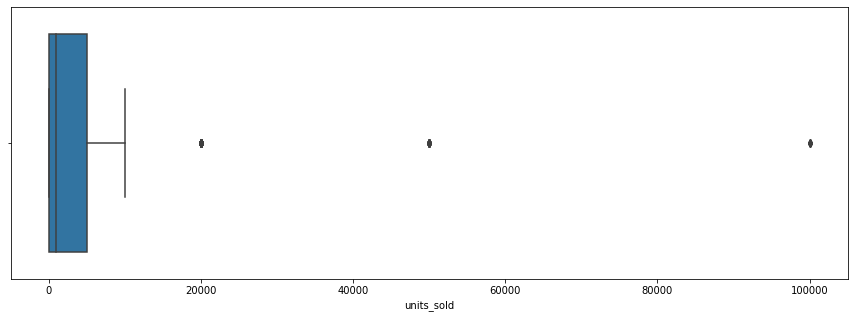

In [64]:
# Checking for outliers in the output variables
sns.boxplot(data['units_sold'])

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

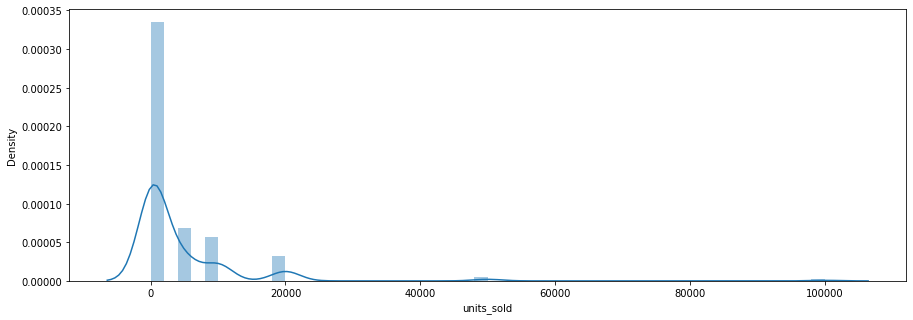

In [65]:
sns.distplot(data['units_sold'])

### Data Transformation

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

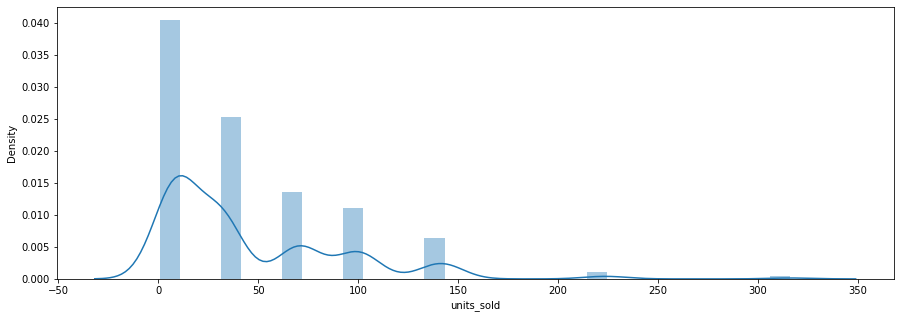

In [66]:
#Transformed Target Variable
sns.distplot(np.sqrt(data['units_sold']))

### Spliting the data into train and test

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=20,test_size=.3)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1101, 48)
(472, 48)
(1101,)
(472,)


In [69]:
x_train

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
1555,8.00,7,0,4.00,8,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
696,6.00,17,0,3.47,55,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
299,11.00,10,1,3.09,22,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
659,12.00,26,0,4.16,663,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
842,12.00,11,1,3.80,2066,0,0,0,0,25,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,5.66,6,0,3.08,13,0,0,0,0,50,...,0,0,1,0,0,0,0,0,0,1
1247,8.00,140,1,4.17,1910,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
271,9.00,50,0,4.17,2440,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
474,9.00,33,0,3.81,719,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0


### Training the model (Bivariate Regression)

#### 1. Ordinary Least Square Method

In [70]:
x_train=sm.add_constant(x_train)
x_train.head()

,const,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
1555,1.0,8.0,7,0,4.00,8,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
696,1.0,6.0,17,0,3.47,55,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
299,1.0,11.0,10,1,3.09,22,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
659,1.0,12.0,26,0,4.16,663,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
842,1.0,12.0,11,1,3.80,2066,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [71]:
mlr_model=sm.OLS(y_train,x_train).fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:46:56   Log-Likelihood:                -10563.
No. Observations:                1101   AIC:                         2.121e+04
Df Residuals:                    1059   BIC:                         2.142e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [72]:
print("As the value of Prob(F-stat) is less than alpha, it clearly means that the model is a significant one.")
print("As the value of Log-liklihood is less, it indicates that the measure of goodness of the model is low.")
print("As the value of Prob(Omnibus) is close to zero, it means that the residulas are not normally distributed around zero.")
print("As the value of skew and kurtosis is high, it means that the residulas are not normally distributed around zero.")
print("As the value of Durbin-Watson Test is close to 2, it means that there is no auto-correlation")
print("As the value of Prob(JB Test)is zero, it means that the residulas are not normally distributed around zero.")
print("As the value of Condition Number is not close to 1000, it means that there is severe multicollinearity between the elements.")

As the value of Prob(F-stat) is less than alpha, it clearly means that the model is a significant one.
As the value of Log-liklihood is less, it indicates that the measure of goodness of the model is low.
As the value of Prob(Omnibus) is close to zero, it means that the residulas are not normally distributed around zero.
As the value of skew and kurtosis is high, it means that the residulas are not normally distributed around zero.
As the value of Durbin-Watson Test is close to 2, it means that there is no auto-correlation
As the value of Prob(JB Test)is zero, it means that the residulas are not normally distributed around zero.
As the value of Condition Number is not close to 1000, it means that there is severe multicollinearity between the elements.


#### Testing accuracy of trained model

In [73]:
x_train= sm.add_constant(x_train)
y_train_predicted=mlr_model.predict(x_train)

x_test= sm.add_constant(x_test)
y_test_predicted=mlr_model.predict(x_test)

In [74]:
y_test_predicted.shape

(472,)

#### Computing accuracy measures

In [75]:
# calculate R-squared using rsquared
mlr_model_rsquared = mlr_model.rsquared
print('R-Squared value:',mlr_model_rsquared)

# calculate Adjusted R-Squared using rsquared_adj
mlr_model_rsquared_adj = mlr_model.rsquared_adj 
print('Adjusted R-Squared value',mlr_model_rsquared_adj,'\n')

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_predicted, y_train),4)
rmse_train = np.sqrt(mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)

# print the MSE for the test set
print("Mean Squared Error (MSE) on train set: ", mse_train)
print("Root Mean Squared Error (RMSE) on train set: ", rmse_train,'\n')

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

R-Squared value: 0.833342700026621
Adjusted R-Squared value 0.8268904343997008 

Mean Squared Error (MSE) on train set:  12611807.4334
Root Mean Squared Error (RMSE) on train set:  3551.310664163303 

Mean Squared Error (MSE) on test set:  23616618.64
Root Mean Squared Error (RMSE) on test set:  4859.693266040564


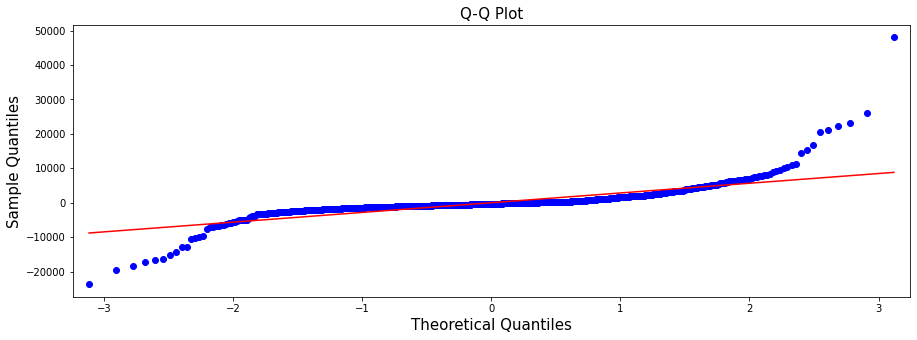

In [76]:
qqplot(mlr_model.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [77]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected

score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE Train', 'RMSE Test','No_Features'])

In [79]:
mlr_model_metrics = pd.Series({
                     'Model_Name': "mlr_full_model",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': mlr_model_rsquared,
                     'Adj. R-Squared': mlr_model_rsquared_adj,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.82689,3551.310664,4859.693266,49


#### 2. Ordinary Least Square Method with Square Root transfomation on dependent variables

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,np.sqrt(Y),random_state=20,test_size=.3)

In [81]:
x_train=sm.add_constant(x_train)
mlr_model=sm.OLS(y_train,x_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     71.40
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.27e-272
Time:                        21:47:17   Log-Likelihood:                -5056.5
No. Observations:                1101   AIC:                         1.020e+04
Df Residuals:                    1059   BIC:                         1.041e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [82]:
x_train= sm.add_constant(x_train)
y_train_predicted=mlr_model.predict(x_train)

x_test= sm.add_constant(x_test)
y_test_predicted=mlr_model.predict(x_test)

#### Computing accuracy measures

In [83]:
# calculate R-squared using rsquared
mlr_model_rsquared = mlr_model.rsquared
print('R-Squared value:',mlr_model_rsquared)

# calculate Adjusted R-Squared using rsquared_adj
mlr_model_rsquared_adj = mlr_model.rsquared_adj 
print('Adjusted R-Squared value',mlr_model_rsquared_adj,'\n')

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_predicted, y_train),4)
rmse_train = np.sqrt(mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)

# print the MSE for the test set
print("Mean Squared Error (MSE) on train set: ", mse_train)
print("Root Mean Squared Error (RMSE) on train set: ", rmse_train,'\n')

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

R-Squared value: 0.7343523069399912
Adjusted R-Squared value 0.7240675520623139 

Mean Squared Error (MSE) on train set:  570.991
Root Mean Squared Error (RMSE) on train set:  23.895417970816077 

Mean Squared Error (MSE) on test set:  680.5768
Root Mean Squared Error (RMSE) on test set:  26.08786691165071


In [84]:
# Adding results of current model 
mlr_model_metrics = pd.Series({
                     'Model_Name': "mlr_model_target_variable_transformed",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': mlr_model_rsquared,
                     'Adj. R-Squared': mlr_model_rsquared_adj,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.826890,3551.310664,4859.693266,49
1,mlr_model_target_variable_transformed,0.734352,0.724068,23.895418,26.087867,49


#### 3. Ordinary Least Square Method with Square root transfomation on independent variables

In [85]:
X_transformed = np.sqrt(X)
X_transformed.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
0,4.000000,3.741657,0.0,1.939072,7.348469,0.0,0.0,0.0,0.0,7.071068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.828427,4.690416,1.0,1.857418,78.326241,0.0,0.0,0.0,0.0,7.071068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.828427,6.557439,0.0,1.889444,3.741657,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.828427,2.828427,1.0,2.007486,24.062419,0.0,0.0,0.0,0.0,7.071068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.649242,1.732051,1.0,1.760682,4.472136,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
x_train,x_test,y_train,y_test=train_test_split(X_transformed,np.sqrt(Y),random_state=20,test_size=.3)

In [87]:
x_train=sm.add_constant(x_train)
x_train.head()

,const,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
1555,1.0,2.828427,2.645751,0.0,2.000000,2.828427,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
696,1.0,2.449490,4.123106,0.0,1.862794,7.416198,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,1.0,3.316625,3.162278,1.0,1.757840,4.690416,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
659,1.0,3.464102,5.099020,0.0,2.039608,25.748786,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
842,1.0,3.464102,3.316625,1.0,1.949359,45.453273,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
mlr_model=sm.OLS(y_train,x_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:47:17   Log-Likelihood:                -4521.2
No. Observations:                1101   AIC:                             9128.
Df Residuals:                    1058   BIC:                             9344.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
print("In this model we were able to increase the value of Adj R-Squared and R-square considerably from the previous model\n")
print("Here as the value of the skew and kurtosis is close to zero we can say that the variance of the residuals is almost similiar")

In this model we were able to increase the value of Adj R-Squared and R-square considerably from the previous model

Here as the value of the skew and kurtosis is close to zero we can say that the variance of the residuals is almost similiar


In [90]:
x_train= sm.add_constant(x_train)
y_train_predicted=mlr_model.predict(x_train)

x_test= sm.add_constant(x_test)
y_test_predicted=mlr_model.predict(x_test)

In [91]:
y_test_predicted.shape

(472,)

### Checking accuracy of the model

In [92]:
# calculate R-squared using rsquared
mlr_model_rsquared = mlr_model.rsquared
print('R-Squared value:',mlr_model_rsquared)

# calculate Adjusted R-Squared using rsquared_adj
mlr_model_rsquared_adj = mlr_model.rsquared_adj 
print('Adjusted R-Squared value',mlr_model_rsquared_adj,'\n')

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_predicted, y_train),4)
rmse_train = np.sqrt(mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)

# print the MSE for the test set
print("Mean Squared Error (MSE) on train set: ", mse_train)
print("Root Mean Squared Error (RMSE) on train set: ", rmse_train,'\n')

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

R-Squared value: 0.8995348358765864
Adjusted R-Squared value 0.8955466157507043 

Mean Squared Error (MSE) on train set:  215.9428
Root Mean Squared Error (RMSE) on train set:  14.694992344332814 

Mean Squared Error (MSE) on test set:  286.6053
Root Mean Squared Error (RMSE) on test set:  16.929421135998716


In [93]:
mlr_model_metrics = pd.Series({
                     'Model_Name': "mlr_transformed_model",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': mlr_model_rsquared,
                     'Adj. R-Squared': mlr_model_rsquared_adj,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.826890,3551.310664,4859.693266,49
1,mlr_model_target_variable_transformed,0.734352,0.724068,23.895418,26.087867,49
2,mlr_transformed_model,0.899535,0.895547,14.694992,16.929421,49


#### 4.Recursive Feature Elimination (RFE)

In [94]:
X_transformed = np.sqrt(X)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,np.sqrt(Y),random_state=20,test_size=.3)

In [96]:
x_train

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,size_xxxxl,country_AT,country_CN,country_GB,country_SG,country_US,country_VE,shipping_option_Livraison standard,shipping_option_Standard Shipping,shipping_option_other
1555,8.00,7,0,4.00,8,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
696,6.00,17,0,3.47,55,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
299,11.00,10,1,3.09,22,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
659,12.00,26,0,4.16,663,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
842,12.00,11,1,3.80,2066,0,0,0,0,25,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,5.66,6,0,3.08,13,0,0,0,0,50,...,0,0,1,0,0,0,0,0,0,1
1247,8.00,140,1,4.17,1910,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
271,9.00,50,0,4.17,2440,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0
474,9.00,33,0,3.81,719,0,0,0,0,50,...,0,0,1,0,0,0,0,1,0,0


In [97]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
rfe_model = RFE(estimator=linreg_rfe)#, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(x_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = x_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['color_black', 'color_dual', 'color_green', 'color_grey', 'color_other',
       'color_purple', 'color_white', 'color_yellow', 'size_l', 'size_m',
       'size_other', 'size_s', 'size_xl', 'size_xs', 'size_xxl', 'size_xxxs',
       'size_xxxxl', 'country_CN', 'country_SG', 'country_US', 'country_VE',
       'shipping_option_Livraison standard',
       'shipping_option_Standard Shipping', 'shipping_option_other'],
      dtype='object')


In [98]:
#Number of variables selected as part of Recursive Feature Elimination
len(signi_feat_rfe)

24

In [99]:
x_train_rfe=x_train[['uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'shipping_option_price',
       'shipping_is_express', 'inventory_total', 'merchant_rating',
       'merchant_has_profile_picture', 'color_brown', 'color_orange',
       'color_other', 'color_pink', 'color_purple', 'size_l', 'size_xl',
       'size_xxl', 'size_xxxxl', 'country_CN', 'country_SG', 'country_US',
       'shipping_option_Livraison standard']]

x_test_rfe=x_test[['uses_ad_boosts', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'shipping_option_price',
       'shipping_is_express', 'inventory_total', 'merchant_rating',
       'merchant_has_profile_picture', 'color_brown', 'color_orange',
       'color_other', 'color_pink', 'color_purple', 'size_l', 'size_xl',
       'size_xxl', 'size_xxxxl', 'country_CN', 'country_SG', 'country_US',
       'shipping_option_Livraison standard']]

y=data['units_sold']

In [100]:
x_train_rfe.shape

(1101, 24)

In [101]:
x_test_rfe.shape

(472, 24)

In [102]:
x_train_rfe=sm.add_constant(x_train_rfe)

mlr_model=sm.OLS(y_train,x_train_rfe).fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     116.6
Date:                Wed, 05 May 2021   Prob (F-statistic):          5.44e-273
Time:                        21:47:18   Log-Likelihood:                -5098.0
No. Observations:                1101   AIC:                         1.024e+04
Df Residuals:                    1077   BIC:                         1.036e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
print("When using Recursive Feature Elimination method the efficiency of the model decreased considerably ")

When using Recursive Feature Elimination method the efficiency of the model decreased considerably 


In [104]:
x_train_rfe= sm.add_constant(x_train_rfe)
y_train_predicted=mlr_model.predict(x_train_rfe)

x_test_rfe= sm.add_constant(x_test_rfe)
y_test_predicted=mlr_model.predict(x_test_rfe)

In [105]:
# calculate R-squared using rsquared
mlr_model_rsquared = mlr_model.rsquared
print('R-Squared value:',mlr_model_rsquared)

# calculate Adjusted R-Squared using rsquared_adj
mlr_model_rsquared_adj = mlr_model.rsquared_adj 
print('Adjusted R-Squared value',mlr_model_rsquared_adj,'\n')

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_predicted, y_train),4)
rmse_train = np.sqrt(mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)

# print the MSE for the test set
print("Mean Squared Error (MSE) on train set: ", mse_train)
print("Root Mean Squared Error (RMSE) on train set: ", rmse_train,'\n')

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

R-Squared value: 0.7135495764378308
Adjusted R-Squared value 0.7074322507721578 

Mean Squared Error (MSE) on train set:  615.705
Root Mean Squared Error (RMSE) on train set:  24.813403635938382 

Mean Squared Error (MSE) on test set:  724.0885
Root Mean Squared Error (RMSE) on test set:  26.908892582192973


In [106]:
mlr_model_metrics = pd.Series({
                     'Model_Name': "mlr_rfe_model",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': mlr_model_rsquared,
                     'Adj. R-Squared': mlr_model_rsquared_adj,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.826890,3551.310664,4859.693266,49
1,mlr_model_target_variable_transformed,0.734352,0.724068,23.895418,26.087867,49
2,mlr_transformed_model,0.899535,0.895547,14.694992,16.929421,49
3,mlr_rfe_model,0.713550,0.707432,24.813404,26.908893,48


#### 5.Fine Tune Linear Regression Model (OLS)

In [107]:
X_transformed = np.sqrt(X)

In [108]:
x_train,x_test,y_train,y_test=train_test_split(X_transformed,np.sqrt(Y),random_state=20,test_size=.3)

In [109]:
x_train=sm.add_constant(x_train)
mlr_model=sm.OLS(y_train,x_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:47:18   Log-Likelihood:                -4521.2
No. Observations:                1101   AIC:                             9128.
Df Residuals:                    1058   BIC:                             9344.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
x_test= sm.add_constant(x_test)
y_test_predicted=mlr_model.predict(x_test)

In [111]:
x_train.columns

Index(['const', 'price', 'retail_price', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'color_black', 'color_blue',
       'color_brown', 'color_dual', 'color_green', 'color_grey',
       'color_orange', 'color_other', 'color_pink', 'color_purple',
       'color_red', 'color_white', 'color_yellow', 'size_l', 'size_m',
       'size_other', 'size_s', 'size_xl', 'size_xs', 'size_xxl', 'size_xxxs',
       'size_xxxxl', 'country_AT', 'country_CN', 'country_GB', 'country_SG',
       'country_US', 'country_VE', 'shipping_option_Livraison standard',
       'shipping_option_Standard Shipping', 'shipping_option_other'],
      dtype='object')

In [112]:
x_tuned_train=x_train.drop(['size_other', 'size_xl', 'size_xs', 'size_xxl',
       'size_xxxxl','merchant_rating','color_yellow','country_VE','color_other','country_AT', 'country_CN', 'country_GB','color_black', 'color_blue',
       'color_brown', 'color_dual', 'color_green', 'color_grey',
       'color_orange', 'color_other', 'color_pink','color_red','rating','merchant_has_profile_picture','badge_product_quality',
       'badges_count','shipping_is_express','size_s','country_US','shipping_option_price','shipping_option_other',
       'retail_price','inventory_total','shipping_option_Standard Shipping','badge_local_product'],axis=1)

x_tuned_test=x_test.drop(['size_other', 'size_xl', 'size_xs', 'size_xxl',
       'size_xxxxl','merchant_rating','color_yellow','country_VE','color_other','country_AT', 'country_CN', 'country_GB','color_black', 'color_blue',
       'color_brown', 'color_dual', 'color_green', 'color_grey',
       'color_orange', 'color_other', 'color_pink','color_red','rating','merchant_has_profile_picture','badge_product_quality',
       'badges_count','shipping_is_express','size_s','country_US','shipping_option_price','shipping_option_other',
       'retail_price','inventory_total','shipping_option_Standard Shipping','badge_local_product'],axis=1)

In [113]:
mlr_model=sm.OLS(y_train,x_tuned_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     673.2
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        21:47:18   Log-Likelihood:                -4536.6
No. Observations:                1101   AIC:                             9103.
Df Residuals:                    1086   BIC:                             9178.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [114]:
print("In this model we got the highest efficiency among all the models. Also we were able to bring down the value of skew and "
      "kurtosis close to the normalcy range and the Condition-Number came down close to 1000 which meant comparatively "
      "lesser Multi-Collinearity when compared to the previous models")

In this model we got the highest efficiency among all the models. Also we were able to bring down the value of skew and kurtosis close to the normalcy range and the Condition-Number came down close to 1000 which meant comparatively lesser Multi-Collinearity when compared to the previous models


In [115]:
x_train_rfe= sm.add_constant(x_tuned_train)
y_train_predicted=mlr_model.predict(x_tuned_train)

x_test_rfe= sm.add_constant(x_tuned_test)
y_test_predicted=mlr_model.predict(x_tuned_test)

In [116]:
# calculate R-squared using rsquared
mlr_model_rsquared = mlr_model.rsquared
print('R-Squared value:',mlr_model_rsquared)

# calculate Adjusted R-Squared using rsquared_adj
mlr_model_rsquared_adj = mlr_model.rsquared_adj 
print('Adjusted R-Squared value',mlr_model_rsquared_adj,'\n')

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_predicted, y_train),4)
rmse_train = np.sqrt(mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)

# print the MSE for the test set
print("Mean Squared Error (MSE) on train set: ", mse_train)
print("Root Mean Squared Error (RMSE) on train set: ", rmse_train,'\n')

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

R-Squared value: 0.8966815940695647
Adjusted R-Squared value 0.8953496809176069 

Mean Squared Error (MSE) on train set:  222.0756
Root Mean Squared Error (RMSE) on train set:  14.902201179691543 

Mean Squared Error (MSE) on test set:  294.2479
Root Mean Squared Error (RMSE) on test set:  17.15365558707531


In [117]:
mlr_model_metrics = pd.Series({
                     'Model_Name': "mlr_tuned_transformed_model",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': mlr_model_rsquared,
                     'Adj. R-Squared': mlr_model_rsquared_adj,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.826890,3551.310664,4859.693266,49
1,mlr_model_target_variable_transformed,0.734352,0.724068,23.895418,26.087867,49
2,mlr_transformed_model,0.899535,0.895547,14.694992,16.929421,49
3,mlr_rfe_model,0.713550,0.707432,24.813404,26.908893,48
4,mlr_tuned_transformed_model,0.896682,0.895350,14.902201,17.153656,49


# Conclusion

FROM THE SCORE CARD IT IS VISIBLE THAT EVEN THOUGH THE MODEL WITH TRANSFORMED VARIABLES HAD SLIGHTLY HIGHER ADJUSTED R-SQUARED VALUE THAN THE FINAL TUNED MODEL. THE NUMBER OF VARIABLES CONSIDERED IS CONSIDERABLY LESS(15) WHEN COMPARED WITH THE PREVIOUS MODEL(49) . SO IN THE FINAL MODEL WE WERE ABLE TO PRODUCE HIGHER EFFICIENCY WITH LESSER VARIABLES CONSIDERED WHICH WAS THE OBJECTIVE OF THIS MACHINE LEARNING MODELLING PROBLEM.



In [118]:
ridge=Ridge(alpha=.1,max_iter=500)
ridge.fit(x_train,y_train)
y_train_predicted=ridge.predict(x_train)
y_test_predicted=ridge.predict(x_test)



In [119]:
mse_train=round(mean_squared_error(y_train_predicted,y_train),4)
rmse_train=np.sqrt(mse_train)
rmse_train

14.695077407077514

In [120]:
mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)
rmse_test

16.925734843722445

In [121]:
mlr_model_metrics = pd.Series({
                     'Model_Name': "Ridge_Regression",
                     'RMSE Train':rmse_train,
                     'RMSE Test':rmse_test,
                     'R-Squared': ridge.score(x_train,y_train),
                     'Adj. R-Squared': '' ,
                     'No_Features' : x_train.shape[1]
                   })

# append our result table using append()
score_card = score_card.append(mlr_model_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE Train,RMSE Test,No_Features
0,mlr_full_model,0.833343,0.82689,3551.310664,4859.693266,49
1,mlr_model_target_variable_transformed,0.734352,0.724068,23.895418,26.087867,49
2,mlr_transformed_model,0.899535,0.895547,14.694992,16.929421,49
3,mlr_rfe_model,0.713550,0.707432,24.813404,26.908893,48
4,mlr_tuned_transformed_model,0.896682,0.89535,14.902201,17.153656,49
5,Ridge_Regression,0.899534,,14.695077,16.925735,49


In [123]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-2,1,5,20,50,100]}
paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge_grid=GridSearchCV(estimator=ridge,param_grid=parameters,cv=10)

In [124]:
ridge_grid.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 5, 20, 50,
                                   100]})

In [125]:
y_train_predicted=ridge_grid.predict(x_train)
y_test_predicted=ridge_grid.predict(x_test)

In [126]:
mse_train=round(mean_squared_error(y_train_predicted,y_train),4)
rmse_train=np.sqrt(mse_train)
print(rmse_train)

mse_test = round(mean_squared_error(y_test_predicted, y_test),4)
rmse_test = np.sqrt(mse_test)
print(rmse_test)

14.850010101006665
16.91304821727887


In [127]:
ridge_grid.best_params_

{'alpha': 50}

In [128]:
ridge_grid.best_estimator_

Ridge(alpha=50)